<a href="https://colab.research.google.com/github/AmitAnant01/Amits_Repo/blob/main/Cats_vs_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os, shutil

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)


In [4]:
#Downloaded the Dataset
!kaggle competitions download -c dogs-vs-cats


 99% 800M/812M [00:03<00:00, 165MB/s]
100% 812M/812M [00:03<00:00, 227MB/s]


In [5]:
import zipfile

with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")


In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
import zipfile
import os

# Unzip train.zip
with zipfile.ZipFile('/content/dataset/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/train')

# Unzip test1.zip
with zipfile.ZipFile('/content/dataset/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/test1')


In [17]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/test1',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 25000 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [18]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
#Create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (255,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding ='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding ='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides=2, padding ='valid'))


model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 253, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 253, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 126, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 124, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 124, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [21]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 105ms/step - accuracy: 0.9925 - loss: 0.0530 - val_accuracy: 1.0000 - val_loss: 1.0155e-29
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 137ms/step - accuracy: 1.0000 - loss: 1.9995e-24 - val_accuracy: 1.0000 - val_loss: 1.7923e-30
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 98ms/step - accuracy: 1.0000 - loss: 2.8598e-20 - val_accuracy: 1.0000 - val_loss: 1.5819e-30
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 1.0000 - loss: 1.8804e-27 - val_accuracy: 1.0000 - val_loss: 2.1272e-30
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 1.0000 - loss: 8.7480e-22 - val_accuracy: 1.0000 - val_loss: 1.5219e-30
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 1.0000 - loss: 1.7656e-20 - val_accuracy: 1.0000 - val_loss: 2.1757e-30
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 1.0000 - loss: 2.9599e-22 - val_accuracy: 1.0000 - val_loss: 2.6709e-30
Epoch 8/10
782/782 ━━━━━━━━━━━━━━

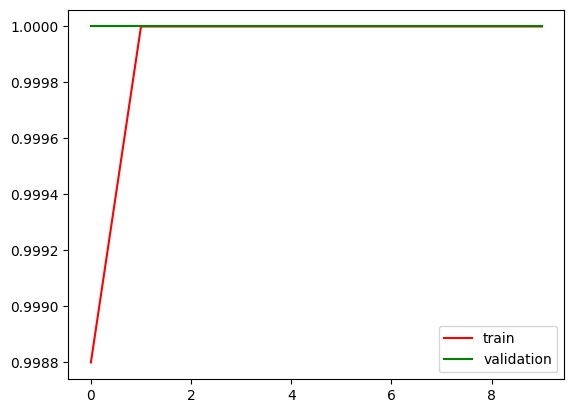

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color= 'red', label= 'train')
plt.plot(history.history['val_accuracy'],color = 'green', label= 'validation')
plt.legend()
plt.show()

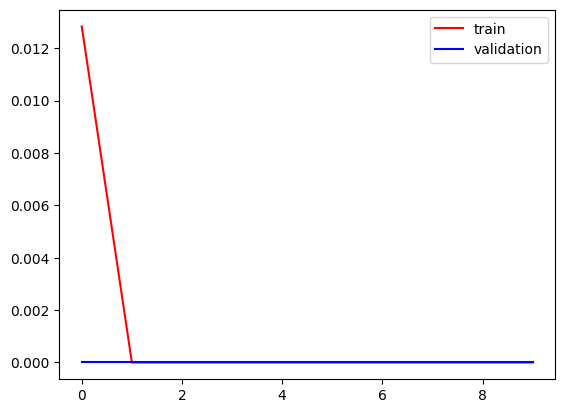

In [24]:
plt.plot(history.history['loss'], color = 'red',label= 'train')
plt.plot(history.history['val_loss'], color = 'blue',label= 'validation')
plt.legend()
plt.show()

In [48]:
import cv2
import numpy as np

# Read image
test_img = cv2.imread('/content/dog.jpeg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Resize to match model input
test_img = cv2.resize(test_img, (256, 256))

test_input = np.expand_dims(test_img, axis=0) / 255.0   # shape: (1,256,256,3)


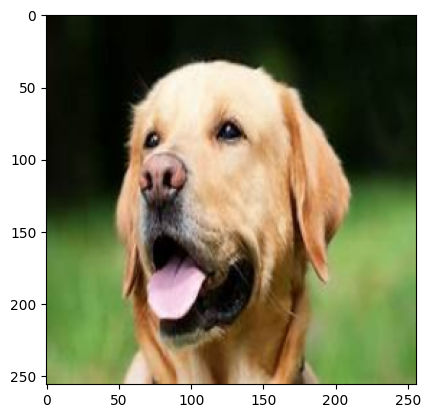

In [49]:
plt.imshow(test_img)

In [50]:
prediction = model.predict(test_input)

if prediction.shape[-1] == 2:
    predicted_class = np.argmax(prediction)
else:
    predicted_class = (prediction > 0.5).astype("int")[0][0]

# Print result
if predicted_class == 0:
    print("This is a Cat")
else:
    print("This is a Dog ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This is a Cat


In [51]:
!zip -r dataset.zip /content/dataset


Streaming output truncated to the last 5000 lines.
  adding: content/dataset/test1/test1/7461.jpg (deflated 1%)
  adding: content/dataset/test1/test1/2686.jpg (deflated 0%)
  adding: content/dataset/test1/test1/8471.jpg (deflated 1%)
  adding: content/dataset/test1/test1/8944.jpg (deflated 1%)
  adding: content/dataset/test1/test1/9692.jpg (deflated 3%)
  adding: content/dataset/test1/test1/3543.jpg (deflated 1%)
  adding: content/dataset/test1/test1/8540.jpg (deflated 1%)
  adding: content/dataset/test1/test1/8529.jpg (deflated 1%)
  adding: content/dataset/test1/test1/7060.jpg (deflated 1%)
  adding: content/dataset/test1/test1/10865.jpg (deflated 2%)
  adding: content/dataset/test1/test1/6137.jpg (deflated 1%)
  adding: content/dataset/test1/test1/8506.jpg (deflated 1%)
  adding: content/dataset/test1/test1/9709.jpg (deflated 1%)
  adding: content/dataset/test1/test1/11298.jpg (deflated 1%)
  adding: content/dataset/test1/test1/8950.jpg (deflated 0%)
  adding: content/dataset/test1/

In [52]:
from google.colab import files
files.download('dataset.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>